<a href="https://colab.research.google.com/github/AlanLinsAlves/Projetos_Pessoais/blob/main/Previsao_geracao_energia_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma Breve Análise e Previsão Sobre a Geração de Energia Solar e Clima Utilizando a Linguagem de Programação Python e Aprendizado de Máquina

![picture](https://drive.google.com/uc?export=view&id=1i16Ljhb3xvL8Zyd4PnndOIXXzglYJ6FE)


Neste notebook é mostrado uma breve análise de dados sobre a produção de energia solar na Alemanha. Para tal foram utilizados dois datasets, um contando com dados da produção de energias renováveis e outro com cados do clima local. Ao fim uma previsão sobre a geração de enrgia solar é feita utilizando-se de técnicas de Machine Learning.

In [ ]:
#Montando o Drive no ambiente do Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importando biblotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Setando estilo de plotagem
sns.set_style()

#Comando para plotar gráficos nas células
%matplotlib inline

## Os Dados

Os dados que utilizei nessa análise estão disponíveis em:

https://open-power-system-data.org/

Trata-se de um site que disponibiliza dados abertos sobre clima e produção de energia na europa. Para esse notebook vou utilizar dois datasets:

* `time_series_60min_singleindex.csv` que contém a carga eólica e solar em resolução horária.
* `weather_data.csv` que contém dados de radiação e temperatura, também em resolução horária.

A princípio vou analisar apenas os dados da Alemanha.

## Dados de Produção de Energia Renovável

Primeiramente vamos ler o arquivo `time_series_60min_singleindex.csv` e tomar apenas os dados relativos a Alemanha. Para isso só foram lidas as colunas que começam com 'utc' (registros de tempo) e 'DE' (dados da Alemanha).

In [ ]:
#Lendo o arquivo .csv
prod_Alemanha = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/time_series_60min_singleindex.csv', usecols = (lambda s: s.startswith('utc') | s.startswith('DE')),
                            parse_dates=[0], index_col=0)

In [ ]:
#Início do dataset
prod_Alemanha.head(2)

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile,DE_50hertz_load_actual_entsoe_transparency,DE_50hertz_load_forecast_entsoe_transparency,DE_50hertz_solar_generation_actual,DE_50hertz_wind_generation_actual,DE_50hertz_wind_offshore_generation_actual,DE_50hertz_wind_onshore_generation_actual,DE_LU_load_actual_entsoe_transparency,DE_LU_load_forecast_entsoe_transparency,DE_LU_price_day_ahead,DE_LU_solar_generation_actual,DE_LU_wind_generation_actual,DE_LU_wind_offshore_generation_actual,DE_LU_wind_onshore_generation_actual,DE_amprion_load_actual_entsoe_transparency,DE_amprion_load_forecast_entsoe_transparency,DE_amprion_solar_generation_actual,DE_amprion_wind_onshore_generation_actual,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,NaN,NaN,37248.0,NaN,NaN,27913.0,NaN,NaN,667.0,NaN,NaN,27246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00+00:00,41151.0,39723.0,37248.0,NaN,NaN,27913.0,8852.0,0.3171,667.0,517.0,0.7744,27246.0,8336.0,0.3059,6839.0,7040.0,NaN,4124.0,48.0,4076.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15163.0,14618.0,NaN,857.0,13841.0,13362.0,NaN,3866.0,469.0,3398.0,5307.0,4703.0,NaN,5.0


In [ ]:
#Final do dataset
prod_Alemanha.tail(2)

,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,DE_wind_offshore_profile,DE_wind_onshore_capacity,DE_wind_onshore_generation_actual,DE_wind_onshore_profile,DE_50hertz_load_actual_entsoe_transparency,DE_50hertz_load_forecast_entsoe_transparency,DE_50hertz_solar_generation_actual,DE_50hertz_wind_generation_actual,DE_50hertz_wind_offshore_generation_actual,DE_50hertz_wind_onshore_generation_actual,DE_LU_load_actual_entsoe_transparency,DE_LU_load_forecast_entsoe_transparency,DE_LU_price_day_ahead,DE_LU_solar_generation_actual,DE_LU_wind_generation_actual,DE_LU_wind_offshore_generation_actual,DE_LU_wind_onshore_generation_actual,DE_amprion_load_actual_entsoe_transparency,DE_amprion_load_forecast_entsoe_transparency,DE_amprion_solar_generation_actual,DE_amprion_wind_onshore_generation_actual,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-09-30 22:00:00+00:00,46886.0,46620.0,NaN,0.0,NaN,NaN,12533.0,NaN,NaN,5399.0,NaN,NaN,7134.0,NaN,9161.0,9081.0,NaN,1133.0,276.0,857.0,47288.0,47012.0,34.4,0.0,12533.0,5399.0,7134.0,17167.0,16995.0,NaN,2048.0,14595.0,14586.0,0.0,9049.0,5123.0,3925.0,5963.0,5958.0,NaN,304.0
2020-09-30 23:00:00+00:00,45461.0,44986.0,NaN,0.0,NaN,NaN,12798.0,NaN,NaN,5381.0,NaN,NaN,7417.0,NaN,8857.0,8737.0,NaN,1220.0,257.0,962.0,45840.0,45356.0,NaN,0.0,12798.0,5381.0,7417.0,16695.0,16451.0,NaN,2074.0,14241.0,14062.0,0.0,9162.0,5124.0,4038.0,5668.0,5735.0,NaN,342.0


Persebe-se que esse dataset tem guardado informações desde o final de 2014 e final de setembro de 2020. Devido à falta de dados, vamos apenas utilizar os dados relativos aos anos de 2015 a 2019.

In [ ]:
#Dados de 2015 a 2019
prod_Alemanha = prod_Alemanha.loc[(prod_Alemanha.index.year == 2015) | 
                                  (prod_Alemanha.index.year == 2016) | 
                                  (prod_Alemanha.index.year == 2017) | 
                                  (prod_Alemanha.index.year == 2018) |
                                  (prod_Alemanha.index.year == 2019)]

Não usaremos todas as colunas desse dataset, portanto elas serão excluídas.

In [ ]:
#Colunas do dataset
list(prod_Alemanha.columns)

['DE_load_actual_entsoe_transparency',
 'DE_load_forecast_entsoe_transparency',
 'DE_solar_capacity',
 'DE_solar_generation_actual',
 'DE_solar_profile',
 'DE_wind_capacity',
 'DE_wind_generation_actual',
 'DE_wind_profile',
 'DE_wind_offshore_capacity',
 'DE_wind_offshore_generation_actual',
 'DE_wind_offshore_profile',
 'DE_wind_onshore_capacity',
 'DE_wind_onshore_generation_actual',
 'DE_wind_onshore_profile',
 'DE_50hertz_load_actual_entsoe_transparency',
 'DE_50hertz_load_forecast_entsoe_transparency',
 'DE_50hertz_solar_generation_actual',
 'DE_50hertz_wind_generation_actual',
 'DE_50hertz_wind_offshore_generation_actual',
 'DE_50hertz_wind_onshore_generation_actual',
 'DE_LU_load_actual_entsoe_transparency',
 'DE_LU_load_forecast_entsoe_transparency',
 'DE_LU_price_day_ahead',
 'DE_LU_solar_generation_actual',
 'DE_LU_wind_generation_actual',
 'DE_LU_wind_offshore_generation_actual',
 'DE_LU_wind_onshore_generation_actual',
 'DE_amprion_load_actual_entsoe_transparency',
 'DE_am

In [ ]:
#Excluido colunas que não serão usadas
prod_Alemanha.drop(['DE_load_actual_entsoe_transparency',
                    'DE_load_forecast_entsoe_transparency',
                    'DE_solar_profile',
                    'DE_wind_capacity',
                    'DE_wind_generation_actual',
                    'DE_wind_profile',
                    'DE_wind_offshore_capacity',
                    'DE_wind_offshore_generation_actual',
                    'DE_wind_offshore_profile',
                    'DE_wind_onshore_capacity',
                    'DE_wind_onshore_generation_actual',
                    'DE_wind_onshore_profile',
                    'DE_50hertz_load_actual_entsoe_transparency',
                    'DE_50hertz_load_forecast_entsoe_transparency',
                    'DE_50hertz_solar_generation_actual',
                    'DE_50hertz_wind_generation_actual',
                    'DE_50hertz_wind_offshore_generation_actual',
                    'DE_50hertz_wind_onshore_generation_actual',
                    'DE_LU_load_actual_entsoe_transparency',
                    'DE_LU_load_forecast_entsoe_transparency',
                    'DE_LU_price_day_ahead',
                    'DE_LU_solar_generation_actual',
                    'DE_LU_wind_generation_actual',
                    'DE_LU_wind_offshore_generation_actual',
                    'DE_LU_wind_onshore_generation_actual',
                    'DE_amprion_load_actual_entsoe_transparency',
                    'DE_amprion_load_forecast_entsoe_transparency',
                    'DE_amprion_solar_generation_actual',
                    'DE_amprion_wind_onshore_generation_actual',
                    'DE_tennet_load_actual_entsoe_transparency',
                    'DE_tennet_load_forecast_entsoe_transparency',
                    'DE_tennet_solar_generation_actual',
                    'DE_tennet_wind_generation_actual',
                    'DE_tennet_wind_offshore_generation_actual',
                    'DE_tennet_wind_onshore_generation_actual',
                    'DE_transnetbw_load_actual_entsoe_transparency',
                    'DE_transnetbw_load_forecast_entsoe_transparency',
                    'DE_transnetbw_solar_generation_actual',
                    'DE_transnetbw_wind_onshore_generation_actual'], axis = 1, inplace = True)

In [ ]:
#Início do nosso dataset
prod_Alemanha.head(3)

,DE_solar_capacity,DE_solar_generation_actual
utc_timestamp,,
2015-01-01 00:00:00+00:00,37248.0,NaN
2015-01-01 01:00:00+00:00,37248.0,NaN
2015-01-01 02:00:00+00:00,37248.0,NaN


Logo no início da nossa base de dados ocorre o aparecimento de NaN's. Vamos tratá-los!

In [ ]:
#Quantidade de dados faltantes na coluna de capacidade solar
prod_Alemanha['DE_solar_capacity'].isnull().sum()

25

In [ ]:
#Quantidade de dados faltantes na coluna de geração de energia solar
prod_Alemanha['DE_solar_generation_actual'].isnull().sum()

103

In [ ]:
#Dataframe que comtém todas as ocorrencias de nan em prod_Alemanha
df = prod_Alemanha[prod_Alemanha.isna().any(axis=1)]

In [ ]:
#Com esses comandos podemos ver todo o nosso dataset df
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

                           DE_solar_capacity  DE_solar_generation_actual
utc_timestamp                                                           
2015-01-01 00:00:00+00:00            37248.0                         NaN
2015-01-01 01:00:00+00:00            37248.0                         NaN
2015-01-01 02:00:00+00:00            37248.0                         NaN
2015-01-01 03:00:00+00:00            37248.0                         NaN
2015-01-01 04:00:00+00:00            37248.0                         NaN
2015-01-01 05:00:00+00:00            37248.0                         NaN
2015-01-01 06:00:00+00:00            37248.0                         NaN
2015-02-28 00:00:00+00:00            37435.0                         NaN
2015-02-28 01:00:00+00:00            37435.0                         NaN
2015-02-28 02:00:00+00:00            37435.0                         NaN
2015-02-28 03:00:00+00:00            37435.0                         NaN
2015-02-28 04:00:00+00:00            37435.0       

Podemos ver que a ocorrência de NaN nunca ocorre duas vezes na mesma linha. Para tratar os dados da coluna de capacidade solar basta apenas repetir o valor máximo do `prod_Alemanha`. Já para a coluna de geração de energia, alimentamos os valores faltantes com 0.


In [ ]:
prod_Alemanha['DE_solar_capacity'].fillna(value = prod_Alemanha['DE_solar_capacity'].max(), inplace = True)

In [ ]:
prod_Alemanha['DE_solar_generation_actual'].fillna(value = 0.0, inplace = True)

In [ ]:
#Início do nosso dataset
prod_Alemanha.head(3)

,DE_solar_capacity,DE_solar_generation_actual
utc_timestamp,,
2015-01-01 00:00:00+00:00,37248.0,0.0
2015-01-01 01:00:00+00:00,37248.0,0.0
2015-01-01 02:00:00+00:00,37248.0,0.0


Com esse dataset tratado, primeiramente vamos observar como nossos dados se comportam ao longo do tempo.

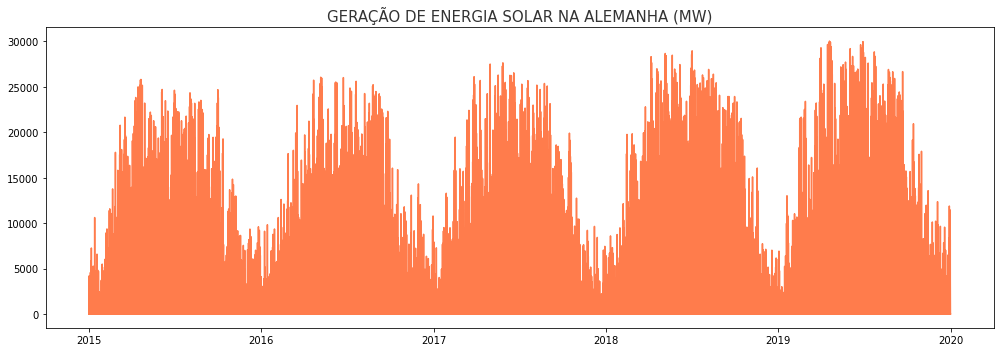

In [ ]:
#Plotando série temporal
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(prod_Alemanha.index, prod_Alemanha['DE_solar_generation_actual'], c = 'orangered', alpha = 0.7)
ax.set_title('GERAÇÃO DE ENERGIA SOLAR NA ALEMANHA (MW)', fontsize = 15, alpha = 0.8)
plt.tight_layout()
plt.show()

Vemos que ocorrem picos de produção de energia a cada ano de forma bem semelhante. A explicação para esse fenômeno é a maior incidência de radiação solar durante o verão na europa que começa em junho e termina em setembro.

Aparentemente esses picos vêm crescendo a cada ano. Para visualizar melhor essa tendência nada melhor que um gráfico de barras. Primeiramente devemos tirar a média da produção de energia solar por ano.

In [ ]:
#Usando groupby para obter as médias
ger_media_ano = list(prod_Alemanha.groupby(prod_Alemanha.index.year).DE_solar_generation_actual.mean())
ger_media_ano

[3972.2453196347033,
 3913.180441712204,
 4096.230365296804,
 4706.846232876713,
 4784.788470319635]

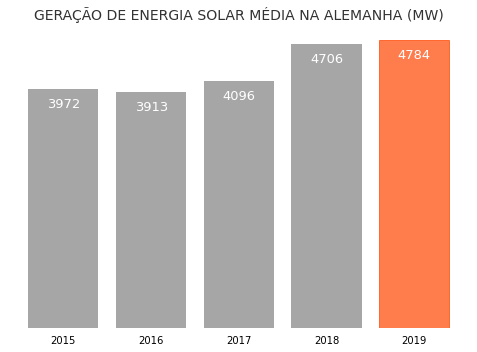

In [ ]:
#Plotando produção média de energia solar por ano
fig1 = plt.subplots(figsize=(7,5))
bars =  plt.bar([2015, 2016, 2017, 2018, 2019], ger_media_ano, alpha = 0.7, color = 'gray')
bars[4].set_color('orangered')
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 300, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=13)

plt.title('GERAÇÃO DE ENERGIA SOLAR MÉDIA NA ALEMANHA (MW)', fontsize = 14, alpha = 0.8)
plt.tight_layout()
plt.show()

Está comprovado que a produção de energia solar na Alemanha vem aumentando! 

Uma das colunas do nosso dataset possui informações sobre a capacidade elétrica solar da Alemanha. Vamos ver como esses dados se comportam ao longo do tempo.

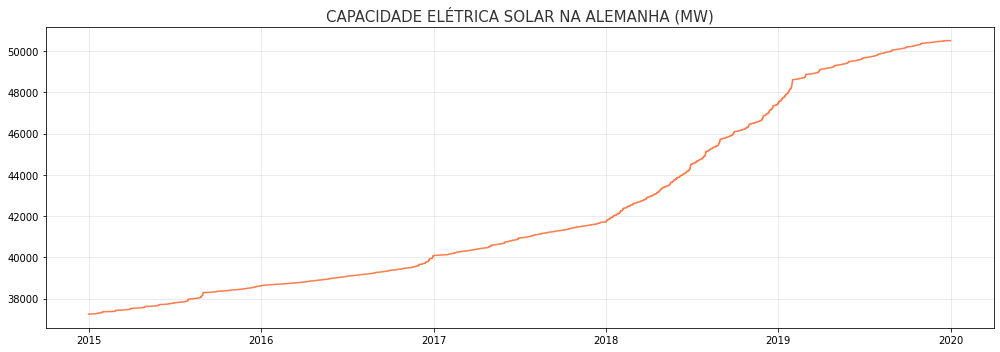

In [ ]:
#Plotando capacidade elétrica solar na Alemanha
fig2, ax2 = plt.subplots(figsize=(14,5))
ax2.plot(prod_Alemanha.index, prod_Alemanha['DE_solar_capacity'], c = 'orangered', alpha = 0.7)
ax2.set_title('CAPACIDADE ELÉTRICA SOLAR NA ALEMANHA (MW)', fontsize = 15, alpha = 0.8)
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

A curva resultate sempre é crescente e bastante acentuada nos ultimos anos. Isto é um indicativo de que na Alemanha está ocorrendo um investimento pesado na produção de energia solar.

## Dados sobre o clima na Alemanha

A seguir vamos ler os dados sobre o clima da alemanha no ano de 2019. O dataset `weather_data.csv` possui dados da alemanha apenas.

In [ ]:
#Lendo o arquivo .csv
clima_Alemanha = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather_data.csv', usecols = (lambda s: s.startswith('utc') | s.startswith('DE')),
                            parse_dates=[0], index_col=0)

In [ ]:
#Informaões sobre o dataset
clima_Alemanha.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350640 entries, 1980-01-01 00:00:00+00:00 to 2019-12-31 23:00:00+00:00
Data columns (total 3 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   DE_temperature                   350640 non-null  float64
 1   DE_radiation_direct_horizontal   350640 non-null  float64
 2   DE_radiation_diffuse_horizontal  350640 non-null  float64
dtypes: float64(3)
memory usage: 10.7 MB


Pode-se perceber que a alemanha registra seus dados desde os anos 80! Apenas vamos precisar dos dados de 2015 a 2019.

In [ ]:
#Lendo apenas os dados de 2015 a 2019
clima_Alemanha = clima_Alemanha.loc[(clima_Alemanha.index.year == 2015) |
                                    (clima_Alemanha.index.year == 2016) |
                                    (clima_Alemanha.index.year == 2017) |
                                    (clima_Alemanha.index.year == 2018) |
                                    (clima_Alemanha.index.year == 2019) ]

In [ ]:
#Mostrando o início do dataset resultante
clima_Alemanha.head(3)

,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
utc_timestamp,,,
2015-01-01 00:00:00+00:00,-0.981,0.0,0.0
2015-01-01 01:00:00+00:00,-1.035,0.0,0.0
2015-01-01 02:00:00+00:00,-1.109,0.0,0.0


In [ ]:
#Mostrando o final do dataset resultante
clima_Alemanha.tail(3)

,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
utc_timestamp,,,
2019-12-31 21:00:00+00:00,0.476,0.0,0.0
2019-12-31 22:00:00+00:00,0.226,0.0,0.0
2019-12-31 23:00:00+00:00,-0.044,0.0,0.0


Vamos ver se existem dados faltantes nesse dataset.

In [ ]:
clima_Alemanha.isnull().sum()

DE_temperature                     0
DE_radiation_direct_horizontal     0
DE_radiation_diffuse_horizontal    0
dtype: int64

Muito bom! Não existe nenhum dado NaN em nossa base de dados

Este dataset possui apenas 4 colunas. São elas o tempo, temperatura,medidas de radiação direta e difusa. 

In [ ]:
#Printando colunas do dataset
print(clima_Alemanha.index.name, *list(clima_Alemanha.columns), sep = '\n')

utc_timestamp
DE_temperature
DE_radiation_direct_horizontal
DE_radiation_diffuse_horizontal


Vamos plotar diversos gráficos para se ter uma ideia melhor das propriedades do dataset sobre o clima.

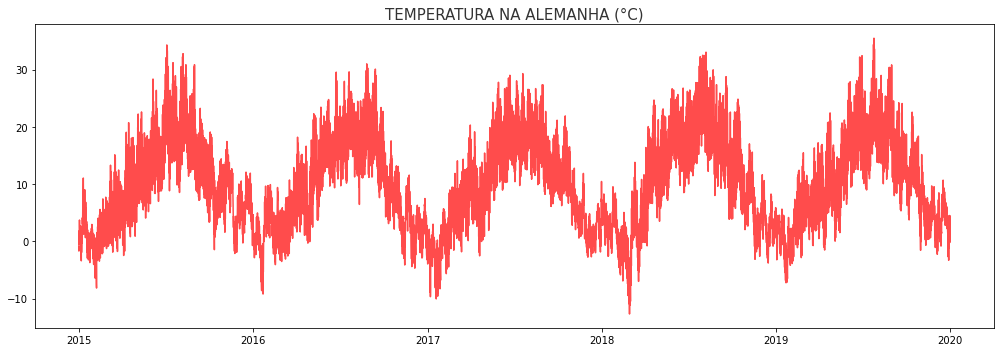

In [ ]:
#Plotando série temporal da temperatura
fig3, ax3 = plt.subplots(figsize=(14,5))
ax3.plot(clima_Alemanha.index, clima_Alemanha['DE_temperature'], c = 'red', alpha = 0.7)
ax3.set_title('TEMPERATURA NA ALEMANHA (°C)', fontsize = 15, alpha = 0.8)
plt.tight_layout()
plt.show()

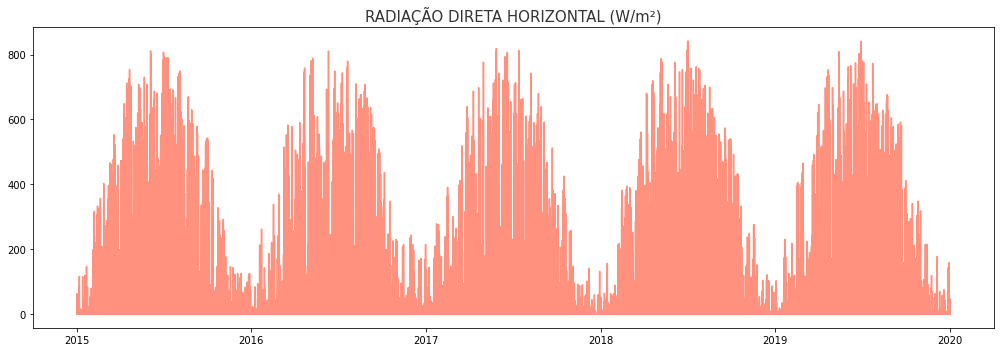

In [ ]:
#Plotando série temporal da radiação direta horizontal
fig4, ax4 = plt.subplots(figsize=(14,5))
ax4.plot(clima_Alemanha.index, clima_Alemanha['DE_radiation_direct_horizontal'], c = 'tomato', alpha = 0.7)
ax4.set_title('RADIAÇÃO DIRETA HORIZONTAL (W/m²)', fontsize = 15, alpha = 0.8)
plt.tight_layout()
plt.show()

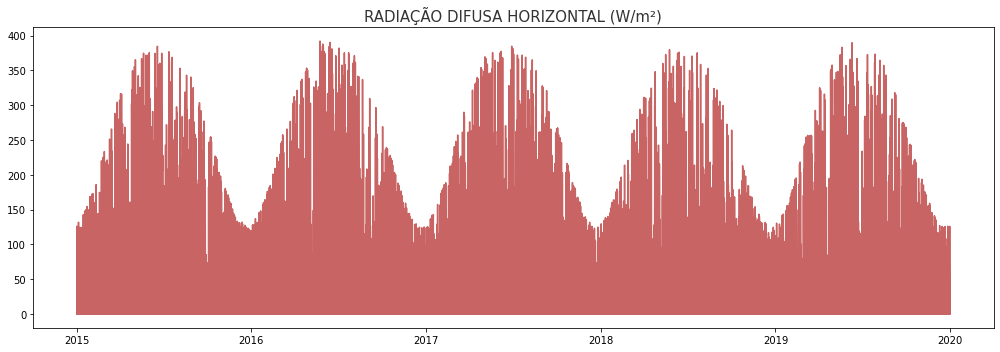

In [ ]:
#Plotando série temporal da radiação difusa horizontal
fig5, ax5 = plt.subplots(figsize=(14,5))
ax5.plot(clima_Alemanha.index, clima_Alemanha['DE_radiation_diffuse_horizontal'], c = 'firebrick', alpha = 0.7)
ax5.set_title('RADIAÇÃO DIFUSA HORIZONTAL (W/m²)', fontsize = 15, alpha = 0.8)
plt.tight_layout()
plt.show()

Como o esperado, todos os gráficos possuem as mesmas características com picos no na estação do verão. Persebe-se ainda que o gráfico de geração de energia solar tem correlação positiva com os três graficos plotados acima!

## Efetuando o Merge nos dois datasets e observando a correlação de variáveis

Podemos visualizar melhor a correlção entre as variáveis a partir da matrix de correlações e plots de dispersão.

In [ ]:
#Combinando datasets
df_Alemanha = pd.merge(prod_Alemanha, clima_Alemanha, how='left', left_index=True, right_index=True)

In [ ]:
#Observando o início da dataset resultante
df_Alemanha.head(3)

,DE_solar_capacity,DE_solar_generation_actual,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
utc_timestamp,,,,,
2015-01-01 00:00:00+00:00,37248.0,0.0,-0.981,0.0,0.0
2015-01-01 01:00:00+00:00,37248.0,0.0,-1.035,0.0,0.0
2015-01-01 02:00:00+00:00,37248.0,0.0,-1.109,0.0,0.0


In [ ]:
#Observando final do dataset resultante
df_Alemanha.tail(3)

,DE_solar_capacity,DE_solar_generation_actual,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
utc_timestamp,,,,,
2019-12-31 21:00:00+00:00,50508.0,0.0,0.476,0.0,0.0
2019-12-31 22:00:00+00:00,50508.0,0.0,0.226,0.0,0.0
2019-12-31 23:00:00+00:00,50508.0,0.0,-0.044,0.0,0.0


Depois de todo o tratamento dos dados podemos observar a matriz de correlação dos nossos dados finais.

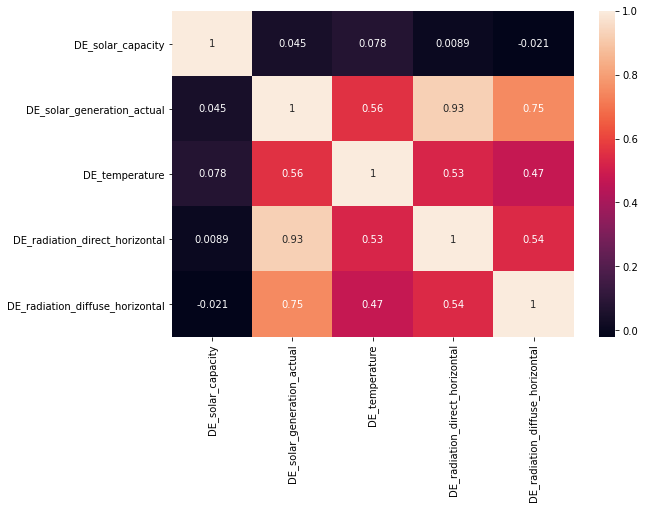

In [ ]:
#Matriz de correlação
fig6 = plt.subplots(figsize=(9,6))
matriz_corr = df_Alemanha.corr()
sns.heatmap(matriz_corr, annot=True)
plt.show()

De todas essas correlações as únicas que nos importam são as seguintes:
* Geração de Energia Solar x Temperatura (0.56)
* Geração de Energia Solar x Radiação Direta Horiontal (0.93)
* Geração de Energia Solar x Radiação Difusa Horizontal (0.75)

Foi confirmada nossa hipótese de que as correlações seriam positivas!

Podemos observar também a correlação por meio de gráficos de dispersão.

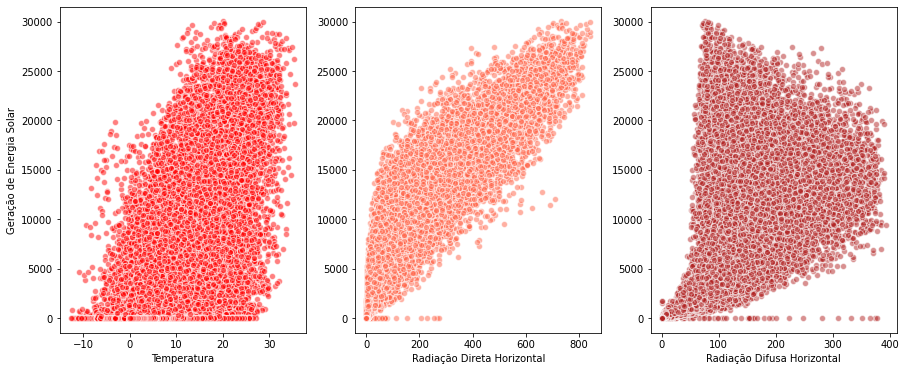

In [ ]:
fig7, (ax7, ax8, ax9) = plt.subplots(nrows = 1, ncols = 3, figsize=(15,6))
ax7.scatter(df_Alemanha['DE_temperature'], df_Alemanha['DE_solar_generation_actual'], c = 'red', alpha = 0.5, edgecolors = 'w')
ax7.yaxis.label.set_text('Geração de Energia Solar')
ax7.xaxis.label.set_text('Temperatura')
ax8.scatter(df_Alemanha['DE_radiation_direct_horizontal'], df_Alemanha['DE_solar_generation_actual'], c = 'tomato', alpha = 0.5, edgecolors = 'w')
ax8.xaxis.label.set_text('Radiação Direta Horizontal')
ax9.scatter(df_Alemanha['DE_radiation_diffuse_horizontal'], df_Alemanha['DE_solar_generation_actual'], c = 'firebrick', alpha = 0.5, edgecolors = 'w')
ax9.xaxis.label.set_text('Radiação Difusa Horizontal')
plt.show()

Podemos ver claramente que a maior correlação é da Geração de Energia Solar x Radiação Direta Horizontal.

## Previsão de Produção de Energia Solar utilizando Machine Learnig

Com as três correlações que estudamos anteriormente, é possível obter uma previsão bastante satisfatória da geração de energia solar apenas com uma regressão linear múltipla. Regressão é uma sub-área do aprendizado de máquina, e para a nossa aplicação vamos utilizar a famosa biblioeteca `scikit-learn`

In [ ]:
#Importando bibliotecas
from sklearn import linear_model
from sklearn.metrics import r2_score

O nosso estudo de regressão vai se ultilizar das médias anuais de cada variável.

In [ ]:
df_pred = df_Alemanha.groupby(prod_Alemanha.index.year).mean()
df_pred.drop('DE_solar_capacity', axis = 1, inplace = True)
df_pred

,DE_solar_generation_actual,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
utc_timestamp,,,,
2015,3972.245320,9.781266,85.477919,66.558518
2016,3913.180442,9.347028,77.361050,68.987935
2017,4096.230365,9.390771,75.183059,69.747408
2018,4706.846233,10.474477,90.586129,64.467758
2019,4784.788470,10.261433,85.161007,65.601613


Com esse dataset em mãos podemos facilmente declarar nossos vetores X e y para o nosso modelo linear multiplo e treiná-lo!

In [ ]:
#Definindo as features e a target
X = df_pred[['DE_temperature', 'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']]
y = df_pred['DE_solar_generation_actual']

In [ ]:
#Definindo nosso modelo de regressão linear múltipla
reg_linear = linear_model.LinearRegression()

In [ ]:
#Ajustando o modelo aos nossos dados
reg_linear.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Coeficientres e intercepto do ajuste
print('Coeficientes: ', *reg_linear.coef_, '\n', 'Intercepto:', reg_linear.intercept_)

Coeficientes:  1470.9769267589243 -90.55483401877859 -74.83228305335992 
 Intercepto: 2317.0311662044423


Com os coeficientes obtidos podemos checar a nossa precisão com base no coeficiete de determinação R²

In [ ]:
#Obterndo as predições do modelo
y_pred = reg_linear.predict(X)
y_pred

array([3983.88246703, 3898.35131752, 4103.09086989, 4697.46382286,
       4790.50235254])

In [ ]:
#Cálculo do coeficiente de determinação
r2_score(y, y_pred)

0.9992516609890102

O coeficiente de determinação obtido foi aproximadamnete 1, isso indica que a aproximação está boa.

Supondo que temos os seguintes dados de clima para 2020:
* Temperatura média: 10.9
* Radiação Direta Horizontal: 92.59
* Radiação Difusa Horizontal: 67.45

A previsão para 2020 seria:


In [ ]:
y_pred_2 = reg_linear.predict(np.array([[10.9, 92.59, 67.45]]))
y_pred_2

array([4918.77009413])

Persebe-se que o resultado encontrado faz sentido com os dados do problema!

## Conclusão

Vale lembrar que a análise feita foi bastante simplificada!

Na prática são coletados dados metereológicos, hidrológicos, energéticos e econômocos para modelos mais precisos e de maior confiança para a previsão de demanda de energia. Ainda são utilizadas técnicas mais avançadas de machine learning para séries temporais tais como deep learning.